In [3]:
!pip install shapely

  Using cached https://files.pythonhosted.org/packages/cf/f8/110690b7c44b9418f573e351084c23d33d782f84416bdb179f1b0f9f401c/Shapely-1.6.4.post2-cp36-cp36m-macosx_10_9_x86_64.whl


In [54]:
import pandas as pd
import geopandas as gpd
import fiona
import descartes
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt

In [5]:
##############
### POINTS ###
##############

# Creating geometry points 2D and 3D

point1 = Point(3.2, 7.7)
point2 = Point(5.2, -18.9)
point3 = Point(-7.86, 6.456)
point4 = Point(-200.345, 187.99)
point3D = Point(5.26, -7.456, -0.33)

In [6]:
point_type = type(point1)

In [7]:
print(point1)
print(point4)
print(point3D)
print(point_type)

POINT (3.2 7.7)
POINT (-200.345 187.99)
POINT Z (5.26 -7.456 -0.33)
<class 'shapely.geometry.point.Point'>


In [8]:
point_coords = point1.coords
type(point_coords)

shapely.coords.CoordinateSequence

In [9]:
# accessing x,y values of a point

xy = point_coords.xy
x = point1.x
y = point1.y

In [10]:
print(xy)
print(x)
print(y)

(array('d', [3.2]), array('d', [7.7]))
3.2
7.7


In [11]:
# Calculating distance between two points

distance_point = point1.distance(point2)

In [12]:
print("Distance between the points is {0:.2f} decimal degrees".format(distance_point))

Distance between the points is 26.68 decimal degrees


In [13]:
#############
### LINES ###
#############

# Creating a line 

line1 = LineString([point1, point2, point3])

In [17]:
line2 = LineString([(4.5, 6.7), (8.31, -12.75), (-7.86, 9.66)])

In [18]:
print(line1)

LINESTRING (3.2 7.7, 5.2 -18.9, -7.86 6.456)


In [19]:
print(line2)

LINESTRING (4.5 6.7, 8.31 -12.75, -7.86 9.66)


In [20]:
type(line1)

shapely.geometry.linestring.LineString

In [22]:
# getting x, y coordinates of a line

line_xy = line1.xy

In [23]:
print(line_xy)

(array('d', [3.2, 5.2, -7.86]), array('d', [7.7, -18.9, 6.456]))


In [24]:
type(line_xy)

tuple

In [26]:
line_x = line_xy[0]
line_y = line1.xy[1]

In [27]:
print(line_x)
print(line_y)

array('d', [3.2, 5.2, -7.86])
array('d', [7.7, -18.9, 6.456])


In [77]:
#exploring attributes a Line object. Length, Centroid, Type of Centroid

line1_length = line1.length
line1_centroid = line1.centroid
centroid_type = type(line1_centroid)

print("Length of line1 is: {0:.2f}".format(line1_length))
print("Centroid of line1 is: ", line1_centroid)
print("Type of the centroid is:", centroid_type)

Length of line1 is: 55.20
Centroid of line1 is:  POINT (1.342493924734209 -5.921404842462083)
Type of the centroid is: <class 'shapely.geometry.point.Point'>


In [78]:
################
### POLYGONS ###
################

# Creating a polygon from coordinates
polygon1 = Polygon([(22.5, 9.6), (-13.66, 4.43), (5.73, -9.18)])
# Creating a polygon using x,y coordinate of existing points)
polygon2 = Polygon([[c.x, c.y] for c in [point1, point2, point3]])

polygon_type1 = polygon1.geom_type
polygon_type2 = type(polygon1)

print(polygon1)
print(polygon2)

print("Polygon type:", polygon_type1)
print("Polygon in Python:", polygon_type2)

POLYGON ((22.5 9.6, -13.66 4.43, 5.73 -9.18, 22.5 9.6))
POLYGON ((3.2 7.7, 5.2 -18.9, -7.86 6.456, 3.2 7.7))
Polygon type: Polygon
Polygon in Python: <class 'shapely.geometry.polygon.Polygon'>


In [83]:
###########################
### POLYGONS WITH HOLES ###
###########################

# Creating the boundry of polygon
polygon_bound = [(-200, 100), (-200, -100), (200, -100), (200, 100)]
# Creating the hole polygon
polygon_hole = [[(-120, 50), (-120, -50), (120, -50), (120, 50)]]

polygon_whole = Polygon(shell=polygon_bound)

polygon_with_hole = Polygon(shell=polygon_bound, holes=polygon_hole)

In [84]:
print(polygon_whole)
print(polygon_with_hole)
type(polygon_with_hole)

POLYGON ((-200 100, -200 -100, 200 -100, 200 100, -200 100))
POLYGON ((-200 100, -200 -100, 200 -100, 200 100, -200 100), (-120 50, -120 -50, 120 -50, 120 50, -120 50))


shapely.geometry.polygon.Polygon

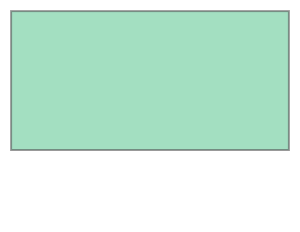

In [85]:
polygon_whole

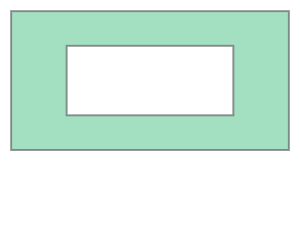

In [86]:
polygon_with_hole

In [88]:
# Exploring Polygon attributes, centroid, area, bounds, exterior, perimeter.

polygon_centroid = polygon_whole.centroid
polygon_area = polygon_whole.area
polygon_box = polygon_whole.bounds
polygon_ext = polygon_whole.exterior
polygon_ext_length = polygon_whole.length

In [89]:
print("Polygon centroid is: ", polygon_centroid)
print("Polygon Area is: ", polygon_area)
print("Polygon Bounding Box is: ", polygon_box)
print("Polygon Exterior is: ", polygon_ext)
print("Polygon Exterior Length is: ", polygon_ext_length)

Polygon centroid is:  POINT (-0 -0)
Polygon Area is:  80000.0
Polygon Bounding Box is:  (-200.0, -100.0, 200.0, 100.0)
Polygon Exterior is:  LINEARRING (-200 100, -200 -100, 200 -100, 200 100, -200 100)
Polygon Exterior Length is:  1200.0


In [32]:
!pwd

/Users/guiter-kundu/Documents/GIS


In [33]:
file_path = "/Users/guiter-kundu/Downloads/Data/DAMSELFISH_distributions.shp"

In [43]:
geodata = gpd.read_file(file_path)

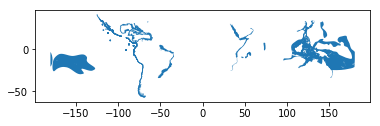

In [44]:
geodata.plot()

In [46]:
plt.show()

In [47]:
geodata['geometry'].head()

0    POLYGON ((-115.6437454219999 29.71392059300007...
1    POLYGON ((-105.589950704 21.89339825500002, -1...
2    POLYGON ((-111.159618439 19.01535626700007, -1...
3    POLYGON ((-80.86500229899997 -0.77894492099994...
4    POLYGON ((-67.33922225599997 -55.6761029239999...
Name: geometry, dtype: object

In [49]:
sample = geodata[0:10]

In [50]:
for index, row in sample.iterrows():
    area_polygon = row['geometry'].area
    print("Polygon area at index {0} is: {1:.3f}".format(index, area_polygon))

Polygon area at index 0 is: 19.396
Polygon area at index 1 is: 6.146
Polygon area at index 2 is: 2.697
Polygon area at index 3 is: 87.461
Polygon area at index 4 is: 0.001
Polygon area at index 5 is: 0.000
Polygon area at index 6 is: 2.732
Polygon area at index 7 is: 2.655
Polygon area at index 8 is: 2.382
Polygon area at index 9 is: 0.536


In [51]:
geodata['area'] = geodata.area

In [52]:
geodata['area'].head(2)

0    19.396254
1     6.145902
Name: area, dtype: float64

In [53]:
maximum_area = geodata['area'].max()

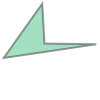

In [69]:
coordinates = [(39.450076, 88.690205), (32.354765, 78.6997441), (49.402399, 81.232214), (39.855774, 81.348769)]
poly = Polygon(coordinates)
poly


In [73]:
grouped_data = geodata.groupby('BINOMIAL')

In [74]:
grouped_data

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


BINOMIAL
Abudefduf concolor         AxesSubplot(0.329414,0.125;0.366171x0.755)
Abudefduf declivifrons     AxesSubplot(0.154088,0.125;0.716824x0.755)
Abudefduf troschelii       AxesSubplot(0.277752,0.125;0.469497x0.755)
Amphiprion sandaracinos    AxesSubplot(0.230864,0.125;0.563272x0.755)
Azurina eupalama             AxesSubplot(0.26258,0.125;0.49984x0.755)
Azurina hirundo            AxesSubplot(0.369567,0.125;0.285866x0.755)
Chromis alpha              AxesSubplot(0.125,0.401738;0.775x0.201525)
Chromis alta                AxesSubplot(0.267285,0.125;0.49043x0.755)
Chromis atrilobata         AxesSubplot(0.268791,0.125;0.487418x0.755)
Chromis crusma             AxesSubplot(0.445788,0.125;0.133423x0.755)
Chromis cyanea             AxesSubplot(0.125,0.161336;0.775x0.682327)
Chromis flavicauda          AxesSubplot(0.39386,0.125;0.237281x0.755)
Chromis intercrusma        AxesSubplot(0.445989,0.125;0.133022x0.755)
Chromis limbaughi          AxesSubplot(0.327526,0.125;0.369947x0.755)
Chromis pem

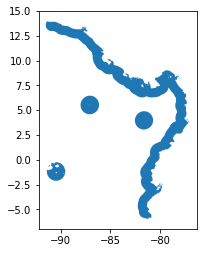

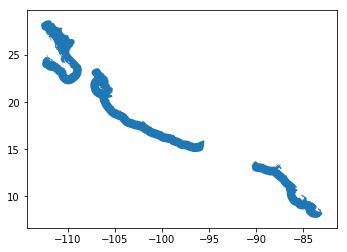

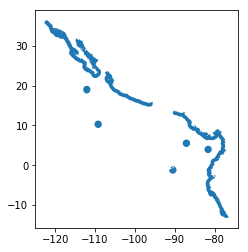

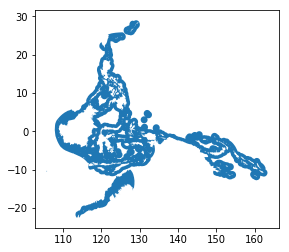

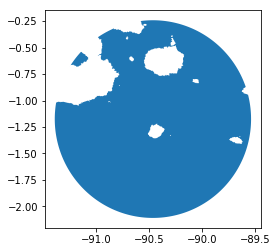

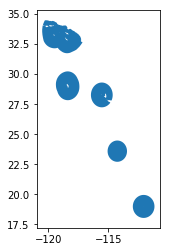

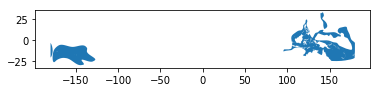

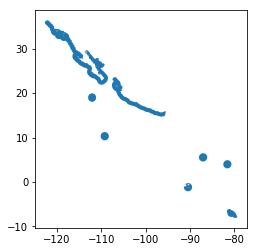

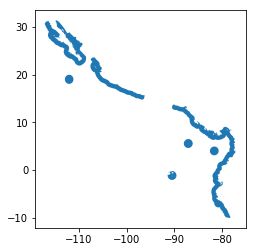

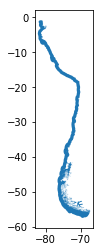

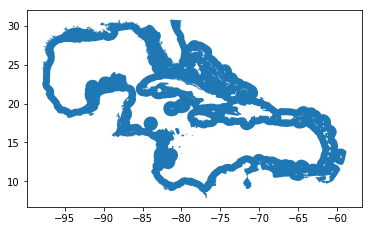

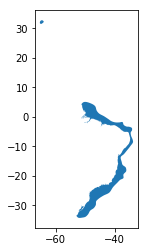

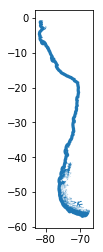

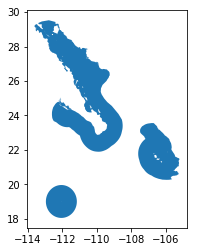

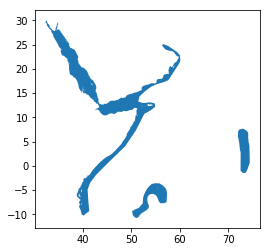

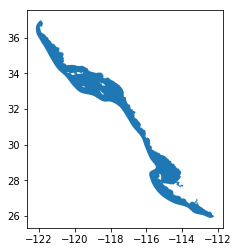

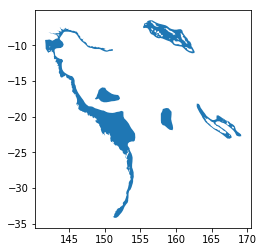

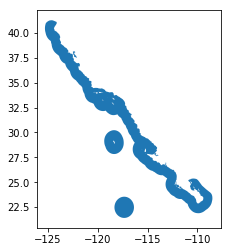

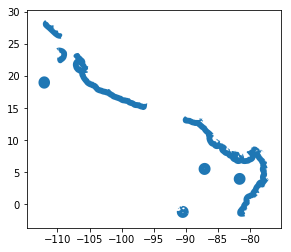

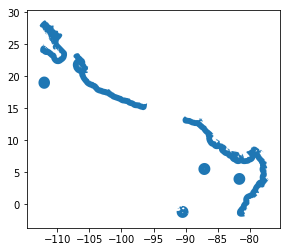

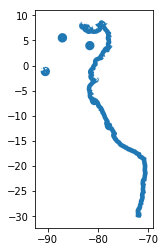

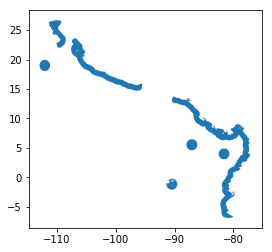

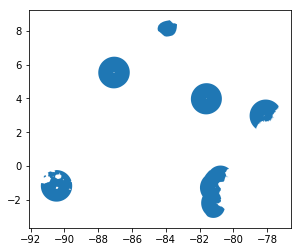

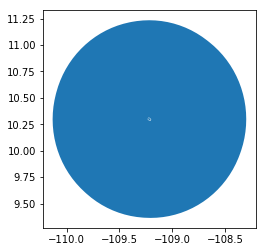

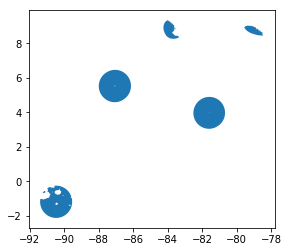

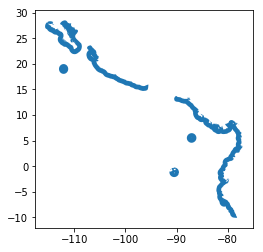

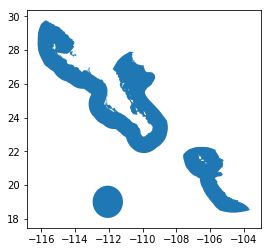

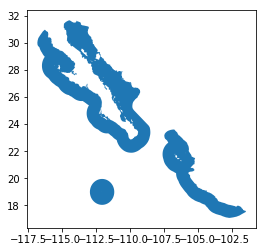

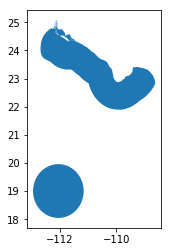

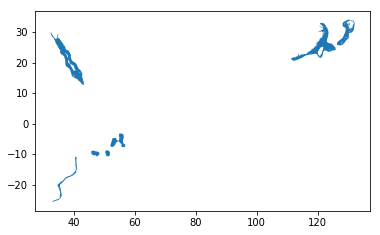

In [76]:
grouped_data.plot()

In [25]:
for key, values in grouped:
    individual_fish = values

In [26]:
individual_fish

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry,area
27,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((121.6300326400001 33.04248618400004,...",38.671198
28,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((32.56219482400007 29.97488975500005,...",37.445735
29,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((130.9052090560001 34.02498196400006,...",16.939460
30,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,POLYGON ((56.32233070000007 -3.707270205999976...,10.126967
31,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,POLYGON ((40.64476131800006 -10.85502363999996...,7.760303
32,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,POLYGON ((48.11258402900006 -9.335103113999935...,3.434236
33,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((51.75403543100003 -9.21679305899994,...",2.408620


In [27]:
print(key)

Teixeirichthys jordani
